### Time series

#### Date and time data types

In [1]:
# Datetime creation

from datetime import datetime

now = datetime.now()

print(now)
## datetime.datetime(2022, 2, 14, 0, 36, 9, 153276)

print(now.day)
## 14

print(now.hour)
## 0

2023-01-02 09:09:50.751817
2
9


#### Set datetime

In [2]:
# Datetime representation

holiday = datetime(2020, 12, 24, 8, 30)

holiday
## datetime.datetime(2020, 12, 24, 8, 30)

exam = datetime(2020, 12, 9, 10)

print("The exam will be on the " + "{:%Y-%m-%d}".format(exam))
## The exam will be on the 2020-12-09

The exam will be on the 2020-12-09


In [3]:
# Datetime difference

from datetime import timedelta

delta = exam - now

print(delta)
## datetime.timedelta(days=-432, seconds=33830, microseconds=846724)

print("The exam will take place in " + str(delta.days) + " days.")
## The exam will take place in -432 days.

print(now)
## datetime.datetime(2022, 2, 14, 0, 36, 9, 153276)

print(now + timedelta(10, 120))
## datetime.datetime(2022, 2, 24, 0, 38, 9, 153276)

-754 days, 0:50:09.248183
The exam will take place in -754 days.
2023-01-02 09:09:50.751817
2023-01-12 09:11:50.751817


#### Convert string and datetime

In [4]:
# Convert Datetime

stamp = datetime(2020, 4, 12)

print(stamp)
## datetime.datetime(2020, 4, 12, 0, 0)

print("German date format: " + stamp.strftime("%d.%m.%Y"))
## German date format: 12.04.2020

val = "2020-5-5"
d = datetime.strptime(val, "%Y-%m-%d")

print(d)
## datetime.datetime(2020, 5, 5, 0, 0)

2020-04-12 00:00:00
German date format: 12.04.2020
2020-05-05 00:00:00


In [5]:
# Converting examples

val = "31.01.2012"
d = datetime.strptime(val, "%d.%m.%Y")

print(d)
## datetime.datetime(2012, 1, 31, 0, 0)

print(now.strftime("Today is %A and we are in week %W of the year %Y."))
## 'Today is Monday and we are in week 07 of the year 2022.'

print(now.strftime("%c"))
## 'Mon Feb 14 00:36:09 2022'

2012-01-31 00:00:00
Today is Monday and we are in week 01 of the year 2023.
Mon Jan  2 09:09:50 2023


#### Overview: Datetime formats

|Type|Description|
|--|--|
|%Y |4-digit year|
|%m |2-digit month [01, 12]|
|%d |2-digit day [01, 31]|
|%H |Hour (24-hour clock) [00, 23]|
|%I |Hour (12-hour clock) [01, 12]|
|%M |2-digit minute [00, 59]|
|%S |Second [00, 61]|
|%W |Week number of the year [00, 53]|
|%F |Shortcut for %Y-%m-%d|
|%a |Abbreviated weekday name|
|%A |Full weekday name|
|%b |Abbreviated month name|
|%B |Full month name|
|%c |Full date and time|
|%x |Locale-appropriate formatted date|

#### Generating date ranges with pandas

In [6]:
# Date ranges

import pandas as pd

index = pd.date_range("2020-01-01", now)

index[0:2]
index[15:16]

index = pd.date_range("2020-01-01", now, freq="M")

index[0:2]
## DatetimeIndex(['2020-01-01', '2...ype='datetime64[ns]', freq='D')
## DatetimeIndex(['2020-01-16'], dtype='datetime64[ns]', freq='D')
## DatetimeIndex(['2020-01-31', '2...ype='datetime64[ns]', freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29'], dtype='datetime64[ns]', freq='M')

#### Overview: Time series frequencies

|Alias |Offset type|
|--|--|
|D |Day|
|B |Business day|
|H |Hour|
|T |Minute|
|S |Second|
|M |Month end|
|BM |Business month end|
|Q-JAN, Q-FEB, ... |Quarter end|
|A-JAN, A-FEB, ... |Year end|
|AS-JAN, AS-FEB, ... |Year begin|
|BA-JAN, BA-FEB, ... |Business year end|
|BAS-JAN, BAS-FEB, ... |Business year begin|

#### Resample date ranges

In [7]:
# Resample date ranges

import numpy as np

start = datetime(2016, 1, 1)

ind = pd.date_range(start, now)

numbers = np.arange((now - start).days + 1)

df = pd.DataFrame(numbers, index=ind)

In [8]:
df.head()
## 0
## 2016-01-01 0
## 2016-01-02 1
## 2016-01-03 2
## 2016-01-04 3
## 2016-01-05 4

,0
2016-01-01,0
2016-01-02,1
2016-01-03,2
2016-01-04,3
2016-01-05,4


In [9]:
df.resample("3BM").sum().head()
## 0
## 2016-01-29 406
## 2016-04-29 6734
## 2016-07-29 15015
## 2016-10-31 24205
## 2017-01-31 32246

,0
2016-01-29,406
2016-04-29,6734
2016-07-29,15015
2016-10-31,24205
2017-01-31,32246


### Moving window

#### Moving window functions

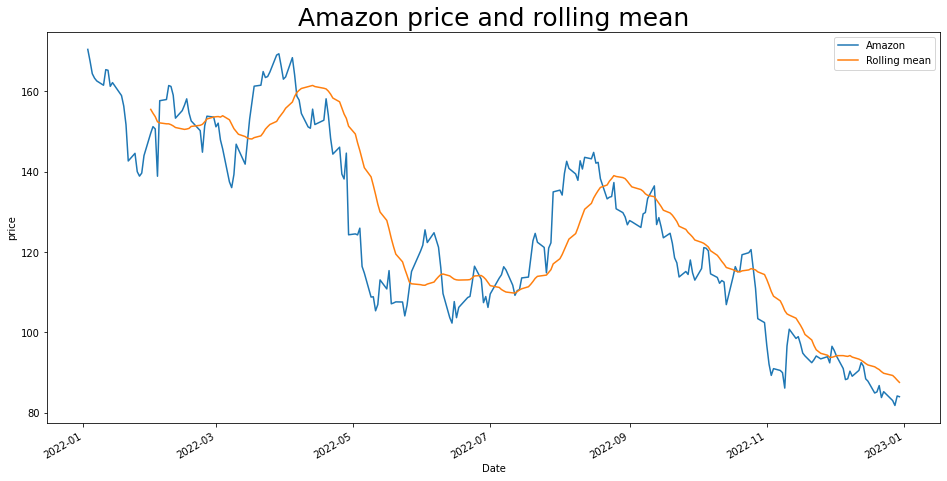

In [10]:
# Rolling mean

import matplotlib.pyplot as plt

amazon = pd.read_csv("data/amzn.csv", 
                     index_col=0,
                     parse_dates=True)["Adj Close"]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel("price")

amazon.plot(ax=ax, label="Amazon")
amazon.rolling(window=20).mean().plot(ax=ax, label="Rolling mean")

ax.legend(loc="best")
ax.set_title("Amazon price and rolling mean", fontsize=25)

fig.savefig("data/amzn.pdf")

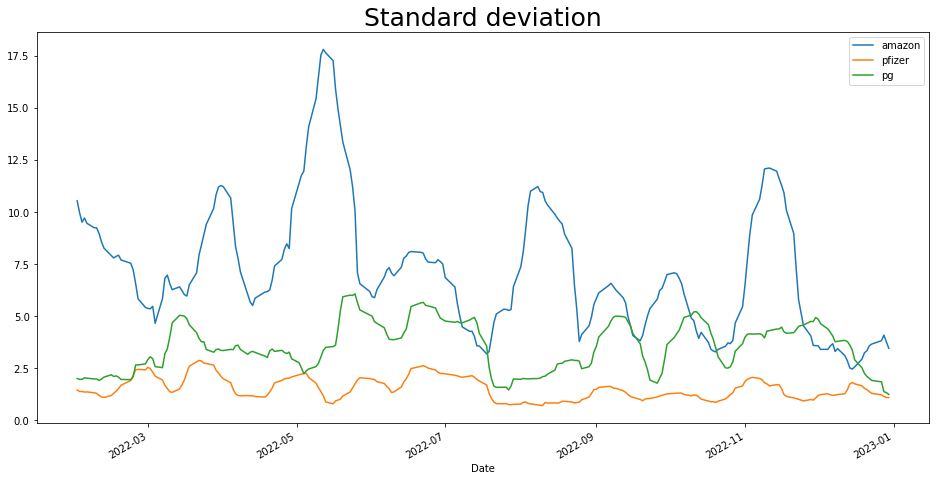

In [11]:
# Standard deviation

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

pfizer = pd.read_csv("data/PFE.csv", 
                     index_col=0,
                     parse_dates=True)["Adj Close"]

pg = pd.read_csv("data/PG.csv", 
                 index_col=0,
                 parse_dates=True)["Adj Close"]

prices = pd.DataFrame(index=amazon.index)

prices["amazon"] = pd.DataFrame(amazon)
prices["pfizer"] = pd.DataFrame(pfizer)
prices["pg"] = pd.DataFrame(pg)

prices_std = prices.rolling(window=20).std()
prices_std.plot(ax=ax)

ax.set_title("Standard deviation", fontsize=25)

fig.savefig("data/std.pdf")

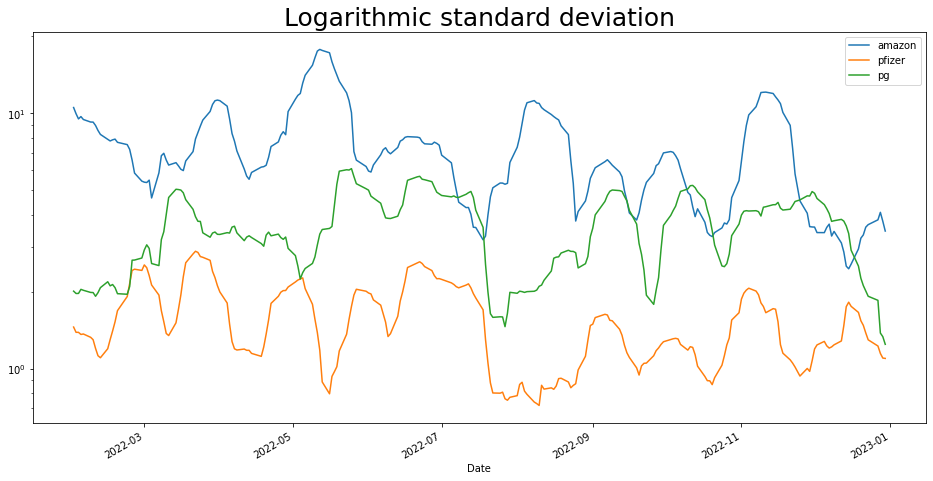

In [12]:
# Logarithmic standard deviation
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

prices_std.plot(ax=ax, logy=True)

ax.set_title("Logarithmic standard deviation", fontsize=25)

fig.savefig("data/std_log.pdf")

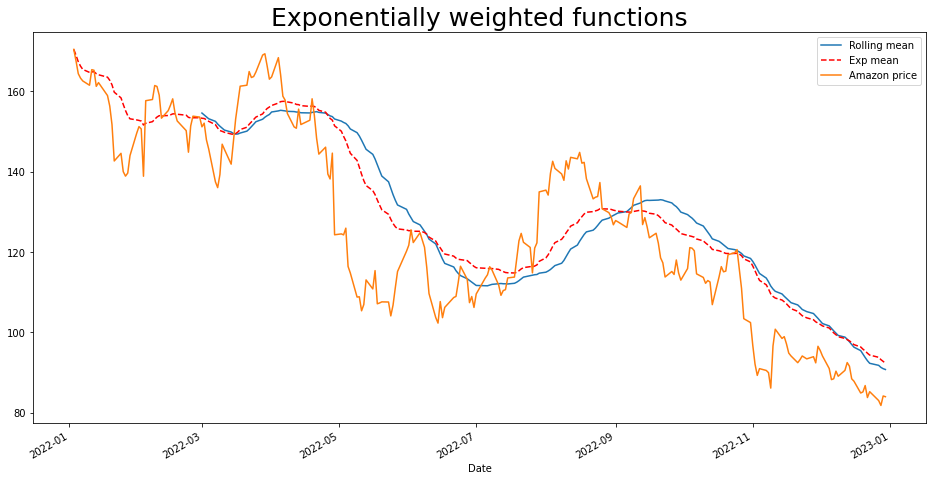

In [13]:
# Exponentially weighted functions

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

amazon.rolling(window=40).mean().plot(ax=ax, label="Rolling mean")
amazon.ewm(span=40).mean().plot(ax=ax, 
                                label="Exp mean",
                                linestyle="--", 
                                color="red")

amazon.plot(ax=ax, label="Amazon price")

ax.legend(loc="best")
ax.set_title("Exponentially weighted functions", fontsize=25)

fig.savefig("data/mean.pdf")

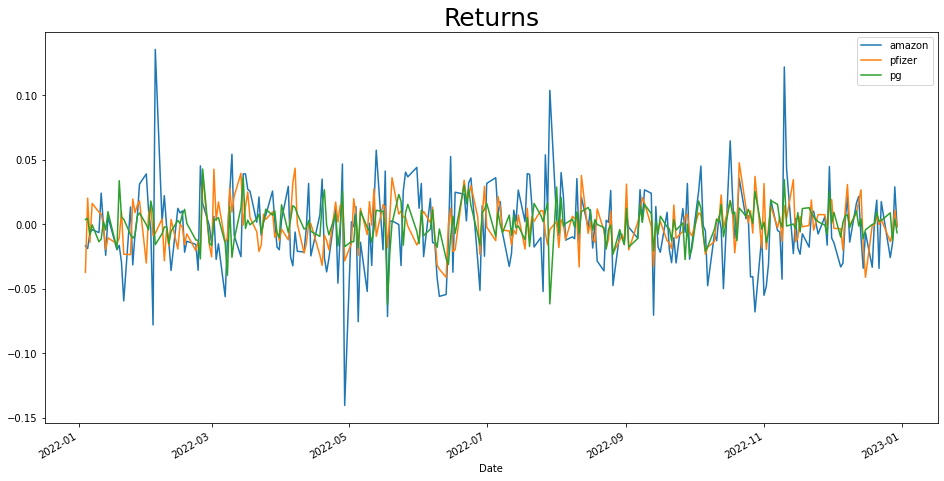

In [14]:
# Percentage change

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
returns = prices.pct_change()

returns.head()
## amazon pfizer pg
## Date
## 2017-02-23 NaN NaN NaN
## 2017-02-24 -0.008155 0.005872 -0.000878
## 2017-02-27 0.004023 0.000584 -0.001757
## 2017-02-28 -0.004242 -0.004668 0.001980
## 2017-03-01 0.009514 0.008792 0.006479
returns.plot(ax=ax)

ax.set_title("Returns", fontsize=25)

fig.savefig("data/returns.pdf")

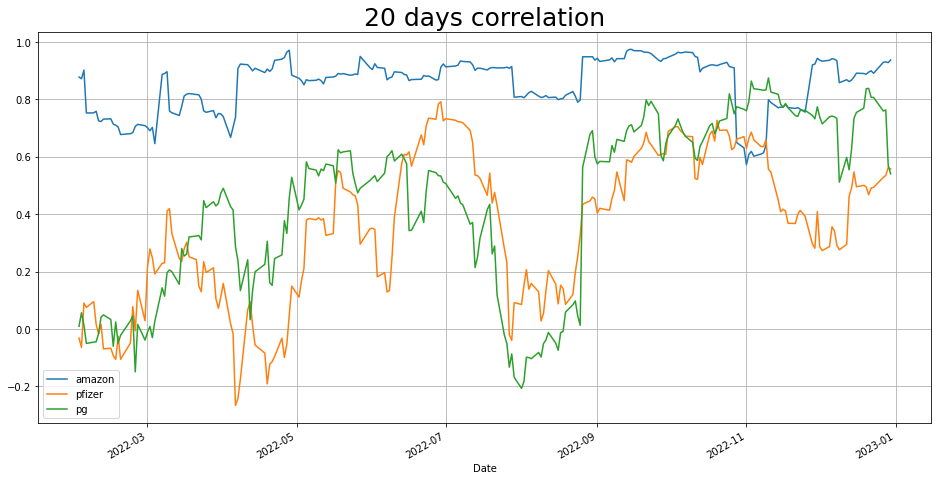

In [15]:
# Correlation

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

DJI = pd.read_csv("data/dji.csv", 
                  index_col=0,
                  parse_dates=True)["Adj Close"]

DJI_ret = DJI.pct_change()
corr = returns.rolling(window=20).corr(DJI_ret)
corr.plot(ax=ax)

ax.grid()
ax.set_title("20 days correlation", fontsize=25)

fig.savefig("data/corr.pdf")

### Financial applications

#### Cumulative returns

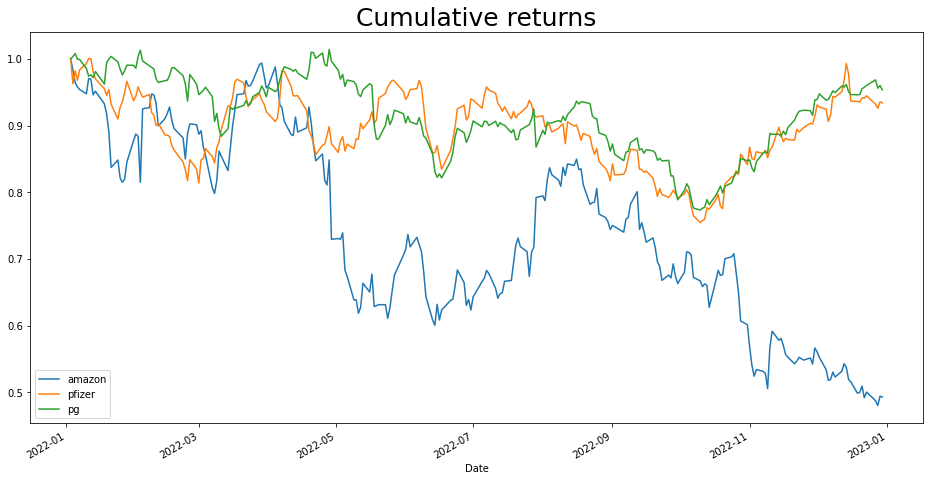

In [16]:
# Returns

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ret_index = (1 + returns).cumprod()
stocks = ["amazon", "pfizer", "pg"]

for i in stocks:
    ret_index[i][0] = 1

ret_index.tail()
## amazon pfizer pg
## Date
## 2018-02-15 1.715298 1.088693 0.932322
## 2018-02-16 1.699961 1.105461 0.934471
## 2018-02-20 1.723031 1.097840 0.920217
## 2018-02-21 1.740128 1.090218 0.907772
## 2018-02-22 1.742968 1.090218 0.914560

ret_index.plot(ax=ax)
ax.set_title("Cumulative returns", fontsize=25)

fig.savefig("data/cumret.pdf")

In [17]:
# Monthly returns

returns_m = ret_index.resample("BM").last().pct_change()
returns_m.head()
## amazon pfizer pg
## Date
## 2017-02-28 NaN NaN NaN
## 2017-03-31 0.049110 0.002638 -0.013396
## 2017-04-28 0.043371 -0.008477 -0.020604
## 2017-05-31 0.075276 -0.028124 0.008703
## 2017-06-30 -0.026764 0.028790 -0.010671

,amazon,pfizer,pg
Date,,,
2022-01-31,NaN,NaN,NaN
2022-02-28,0.026673,-0.109129,-0.028420
2022-03-31,0.061437,0.102897,-0.019822
2022-04-29,-0.237525,-0.052154,0.056615
2022-05-31,-0.032764,0.089720,-0.078916


#### Volatility calculation

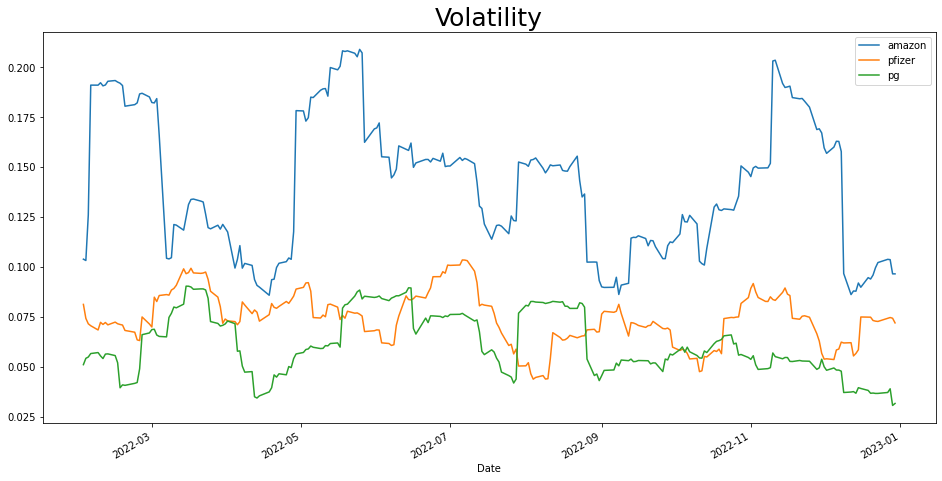

In [18]:
# Volatility

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)

vola = returns.rolling(window=20).std() * np.sqrt(20)

vola.plot(ax=ax)
ax.set_title("Volatility", fontsize=25)

fig.savefig("data/vola.pdf")

#### Group analysis

In [19]:
# Describe

prices.describe()
## amazon pfizer pg
## count 252.000000 251.000000 252.000000
## mean 1044.521903 33.892665 87.934304
## std 158.041844 1.694680 2.728659
## min 843.200012 30.872143 79.919998
## 25% 953.567474 32.593733 86.241475
## 50% 988.680023 33.147469 87.863598
## 75% 1136.952484 35.331834 90.363035
## max 1485.339966 38.661823 92.988976

,amazon,pfizer,pg
count,251.000000,251.000000,251.000000
mean,126.098819,49.075323,145.509824
std,23.904315,3.013209,9.259368
min,81.820000,41.395210,122.887871
25%,108.889499,47.142021,139.961632
50%,122.769997,49.436291,145.636429
75%,145.857506,51.461204,152.773918
max,170.404495,54.906826,161.211899


#### Return analysis

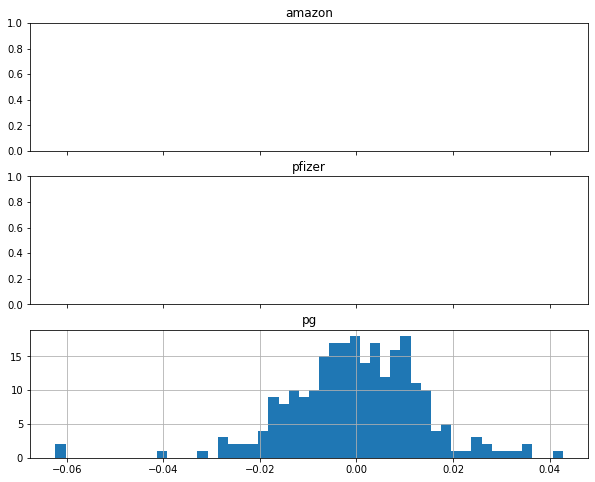

In [20]:
# Histogram

fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i in range(3):
    ax[i].set_title(stocks[i])

returns[stocks[i]].hist(ax=ax[i], bins=50)

fig.savefig("data/return_hist.pdf")

#### Ordinary Least Squares

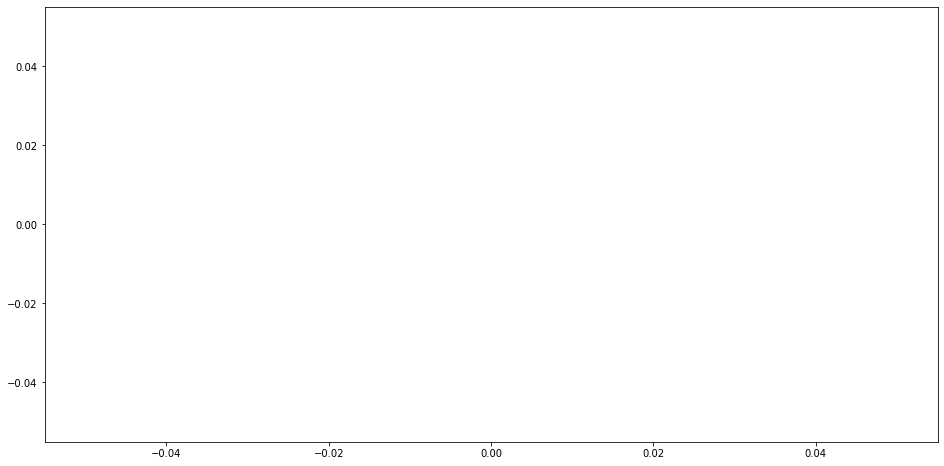

In [21]:
# Regression data

import statsmodels.api as sm

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

Y = np.array(amazon.loc["2018-1-1":"2018-1-15"].tolist())
X = np.arange(len(Y))

ax.scatter(x=X, y=Y, marker="o", color="red")

fig.savefig("data/reg_data.pdf")

#### Ordinary Least Squares

In [ ]:
# Regression

X_reg = sm.add_constant(X)

res = sm.OLS(Y, X_reg).fit()

b, a = res.params

ax.plot(X, a * X + b)

fig.savefig("data/ols.pdf")

### Optimization

#### Newton-Raphson implementation

In [23]:
# Newton-Raphson requirements

def f(x):
    return 3 * x**3 + 3 * x**2 - 5 * x

def df(x):
    return 9 * x**2 + 6 * x - 5

In [24]:
import numpy as np

Root at: 0.8878


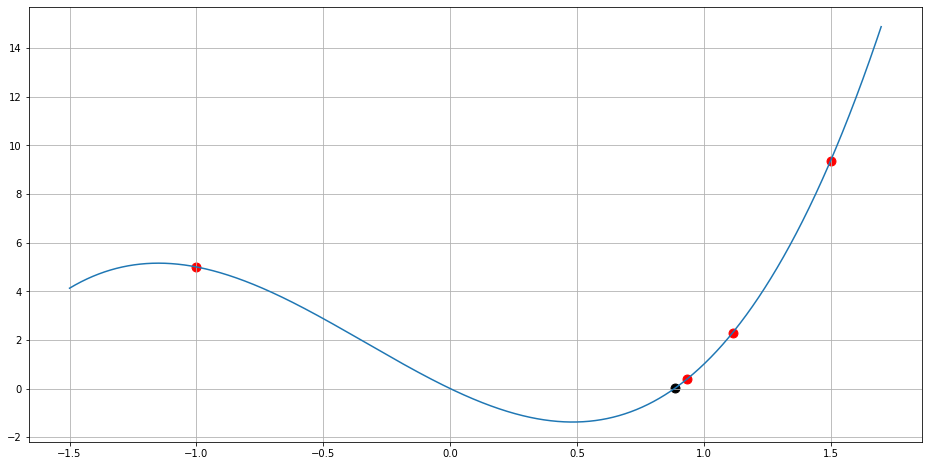

In [25]:
# Newton-Raphson

def newton_raphson(fun, dfun, x0, e):
    delta = abs(fun(x0))

    while delta > e:
        ax.scatter(x0, f(x0), color="red", s=80)
        x0 = x0 - fun(x0) / dfun(x0)
        delta = abs(fun(x0))

    ax.scatter(x0, f(x0), color="black", s=80)
    return(x0)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)

x = np.arange(-1.5, 1.7, 0.001)

ax.plot(x, f(x))
ax.grid()

x_root = newton_raphson(f, df, -1, 0.1)

fig.savefig("data/newton_raphson_root.pdf")

print(f"Root at: {x_root:.4f}")
## Root at: 0.8878

Minimum at: 0.4886


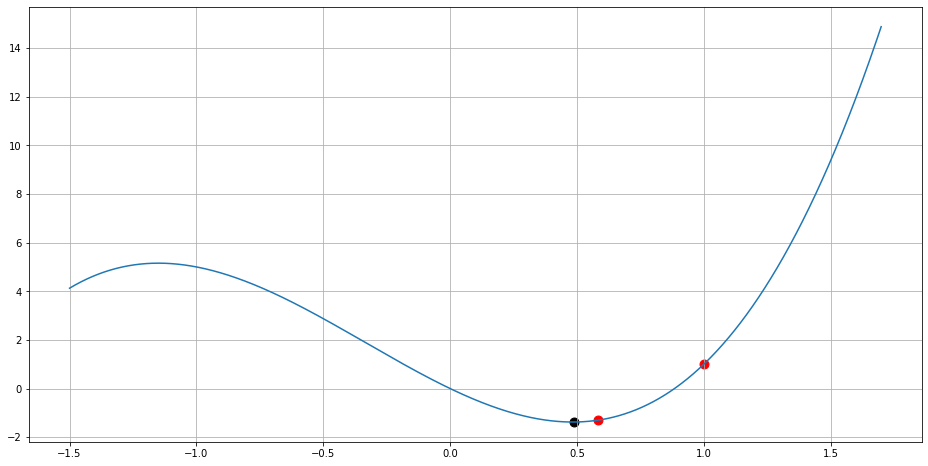

In [26]:
def ddf(x):
    return 18 * x + 6

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)

x = np.arange(-1.5, 1.7, 0.001)

ax.plot(x, f(x))
ax.grid()

x_opt = newton_raphson(df, ddf, 1, 0.1)

fig.savefig("data/newton_raphson_optimum.pdf")

print(f"Minimum at: {x_opt:.4f}")
## Minimum at: 0.4886

#### Optimization with SciPy

#### The minimize function

In [27]:
# Import minimize
from scipy.optimize import minimize

#### 1D optimization

In [28]:
# 1D optimization using minimize

def f(x):
    return (x - 4)**2 + 3

x0 = [1] # the initial guess

result = minimize(f, x0)

result
## fun: 3.0000000000000036
## hess_inv: array([[0.49999999]])
## jac: array([-8.94069672e-08])
## message: 'Optimization terminated successfully.'
## nfev: 6
## nit: 2
## njev: 3
## status: 0
## success: True
## x: array([3.99999994])

      fun: 3.0000000000000036
 hess_inv: array([[0.49999999]])
      jac: array([-8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.99999994])

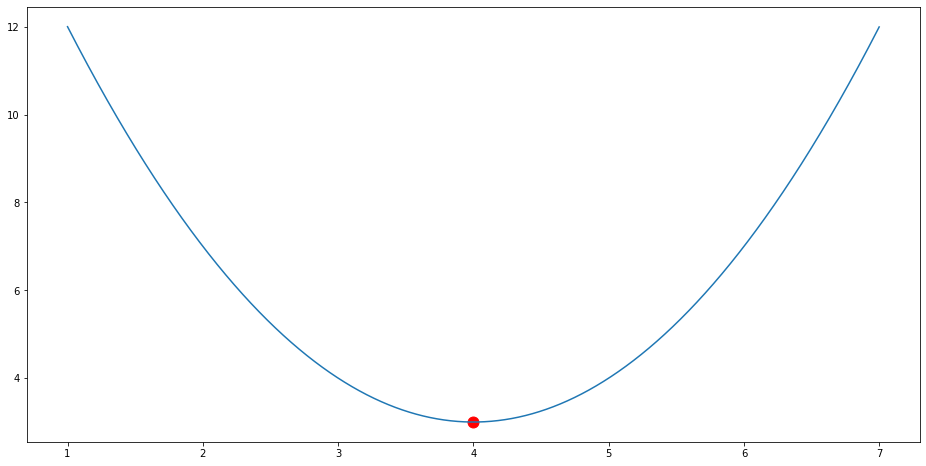

In [29]:
# 1D optimization using minimize

min_y = result.fun # get minimum of the function f
min_x = result.x # get the x value of the minimum

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
x = np.arange(1, 7, 0.001)

ax.plot(x, f(x))
ax.scatter(min_x, min_y, color="red", s=120)

fig.savefig("data/minimize_1D.pdf")

#### 2D optimization

In [30]:
# 2D optimization using minimize

def f(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

x0 = [0, 0] # the initial guess

result = minimize(f, x0)

result
## fun: 1.968344227868139e-15
## hess_inv: array([[ 0.93103448, -0.1724138 ],
## [-0.1724138 , 0.56896552]])
## jac: array([-6.95567350e-08, 4.21085256e-08])
## message: 'Optimization terminated successfully.'
## nfev: 9
## nit: 2
## njev: 3
## status: 0
## success: True
## x: array([0.99999996, 2.50000001])

      fun: 1.968344227868139e-15
 hess_inv: array([[ 0.93103448, -0.1724138 ],
       [-0.1724138 ,  0.56896552]])
      jac: array([-6.95567350e-08,  4.21085256e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999996, 2.50000001])

#### Comparison of solver algorithms

In [31]:
# Comparison

def rosen(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x0 = [1.3, 0.4] # random initial guess

res_1 = minimize(rosen, x0, method="Nelder-Mead")
res_2 = minimize(rosen, x0, method="Powell")
res_3 = minimize(rosen, x0, method="CG")
res_4 = minimize(rosen, x0, method="BFGS")

In [32]:
# Comparison results

# The perfect solution would be (1, 1)

print(res_1.x)
## array([1.00000287, 1.00000496])

print(res_2.x)
## array([1., 1.])

print(res_3.x)
## array([0.99999552, 0.99999104])

print(res_4.x)
## array([0.99999554, 0.99999108])

[1.00000287 1.00000496]
[1. 1.]
[0.99999552 0.99999104]
[0.99999554 0.99999108]


#### Constrained optimization

In [33]:
# Tin can optimization

def s(x):
    r = x[0]
    h = x[1]
    return 2 * np.pi * r * (r + h)

def v(x):
    r = x[0]
    h = x[1]
    return np.pi * r**2 * h - 500 # as it is compared to zero

In [34]:
# Constraints

con = {"type": "eq", "fun": v}

#### Constrained optimization result

In [35]:
# Tin can optimization

x0 = [1, 1]

result = minimize(s, x0, method="SLSQP", constraints=con)

print(result)
## fun: 348.7342054449393
## jac: array([108.10270309, 27.02567673])
## message: 'Optimization terminated successfully'
## nfev: 29
## nit: 9
## njev: 9
## status: 0
## success: True
## x: array([4.3012702 , 8.60253961])

x = result.x

     fun: 348.73420544452335
     jac: array([108.10271072,  27.02567291])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([4.30126983, 8.60254111])


In [36]:
# Tin can optimization result

r, h = x

print(r)
## 4.301270202292404

print(h)
## 8.60253960537927

print(np.pi * r**2 * h)
## 499.99999998290457

print(s(x))
## 348.7342054449393

4.301269826608837
8.602541108098178
499.9999999820085
348.73420544452335


In [37]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

statsmodels: 0.13.2
numpy      : 1.23.0
matplotlib : 3.5.2
pandas     : 1.4.3
sys        : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]



### END.